<a href="https://colab.research.google.com/github/vheastman/FOMC/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string

from collections import Counter
from nltk import word_tokenize, download
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [45]:
# Globals
download('stopwords')
download('punkt')
download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [46]:
## Functions
def word_cloud(df, fp=[], stwds=stop_words):
    # Generate a word cloud image
    wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stwds, background_color="white").generate(text)

    plt.figure(figsize=(10,10))
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    if fp:
        wordcloud.to_file(fp)

def collect_ngrams(txt, n=2, how_many=20):
    txt1 = txt.lower()

    tokens = word_tokenize(txt1)
    tokens = [t for t in tokens if t not in stop_words]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    grams = list(ngrams(tokens, n))
    counter = Counter(grams)
    return(counter.most_common(20))

In [39]:
# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/vheastman/FOMC/main/statements_with_labels.csv")
df = df.drop('Unnamed: 0', axis=1) # Drop this, but this is annoying
df.date = pd.to_datetime(df.date, format='%Y-%m-%d') # Parse the date field

# Let's look at the Treasury data, just for fun
treas = pd.read_csv('https://raw.githubusercontent.com/vheastman/FOMC/main/USTREASURY-YIELD.csv')
treas.Date = pd.to_datetime(treas.Date, format='%Y-%m-%d') # Parse the date field
treas = treas.sort_values('Date').reset_index().drop('index',axis=1)

In [40]:
treas.head()

,Date,1 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
0,1990-01-02,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,1990-01-03,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,1990-01-04,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,1990-01-05,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,1990-01-08,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [41]:
df.head()

,date,text,labels
0,1994-02-04,Chairman Alan Greenspan announced today that t...,1
1,1994-03-22,Chairman Alan Greenspan announced today that t...,1
2,1994-04-18,Chairman Alan Greenspan announced today that t...,0
3,1994-05-17,The Federal Reserve today announced two action...,1
4,1994-08-16,The Federal Reserve announced today the follow...,0


## Word Counts

In [72]:
# Determine word counts
out = {} # Initialize dictionary to store statment lengths
counts = {} # initialize dictionary of word counts
for i in range(0,df.shape[0]):
    words = df.loc[i,'text'].split()
    for j in words:
        j = j.lower()
        if j not in counts.keys():
            counts[j] = 1
        else:\
            counts[j] += 1
    out[df.loc[i,'date']] = len(words)
statement_lengths = pd.DataFrame.from_dict(out, orient='index').rename(columns = {0:'length'})

In [74]:
print('Number of statements: ' + str(statements.shape[0]))
print('Unique words: ' + str(len(counts)))

print('')
print('Shortest statement: ' + str(np.min(statement_lengths.length)) + ' words')
print('Longest statement: ' + str(np.max(statement_lengths.length)) + ' words')
print('Average statement length: ' + str(np.mean(statement_lengths.length)) + ' words')

Number of statements: 171
Unique words: 2438

Shortest statement: 36 words
Longest statement: 993 words
Average statement length: 407.81176470588235 words


Text(0.5, 1.0, 'FOMC Statement Lengths Over Time')

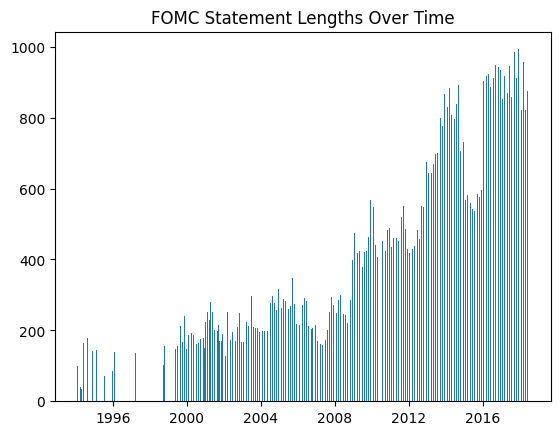

In [82]:
plt.bar(x = statement_lengths.index, height = statement_lengths.length, width = 20)
plt.title("FOMC Statement Lengths Over Time")